In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

print(tf.test.gpu_device_name())

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00066-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00166-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00167-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00168-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]
# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-044f4ef7-57a8-43e9-a02e-be1de547e5ce-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,0.99,63.36,106.238703,106.238703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.18,42.0,42.18,42.009000,0.039230,42.18,8.312463e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.20,6.00,64.00,2.650955,2.650955,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.01,0.0,0.99,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,570.20,54.0,57.20,54.302881,0.910514,54.20,8.331381e+07,9.5,10.421200,1.289175,5.376863,0.16,141.55,DDoS-PSHACK_Flood
2,0.000000,0.00,1.00,64.00,26.901265,26.901265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312472e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.093392,71993.00,17.00,64.00,15462.296279,15462.296279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.312349e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,3.975955,108.00,6.00,64.00,0.503025,0.503025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.297753e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127521,0.000000,54.00,6.00,64.00,25.224003,25.224003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.307636e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
1127522,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1127523,4.274490,107.85,6.00,64.00,0.463217,0.463217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.78,54.0,54.78,54.040026,0.172084,54.39,8.294658e+07,9.5,10.396218,0.246316,1.516787,0.02,141.55,DoS-TCP_Flood
1127524,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            174188
DDoS-UDP_Flood             131119
DDoS-TCP_Flood             108164
DDoS-PSHACK_Flood           98595
DDoS-SYN_Flood              98191
DDoS-RSTFINFlood            97908
DDoS-SynonymousIP_Flood     86196
DoS-UDP_Flood               80099
DoS-TCP_Flood               64684
DoS-SYN_Flood               48809
BenignTraffic               26533
Mirai-greeth_flood          24164
Mirai-udpplain              21716
Mirai-greip_flood           18317
DDoS-ICMP_Fragmentation     11014
MITM-ArpSpoofing             7257
DDoS-ACK_Fragmentation       7001
DDoS-UDP_Fragmentation       6792
DNS_Spoofing                 4283
Recon-HostDiscovery          3205
Recon-OSScan                 2314
Recon-PortScan               2037
DoS-HTTP_Flood               1745
VulnerabilityScan             952
DDoS-HTTP_Flood               719
DDoS-SlowLoris                516
DictionaryBruteForce          330
SqlInjection                  145
CommandInjection              132
BrowserHijacki

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

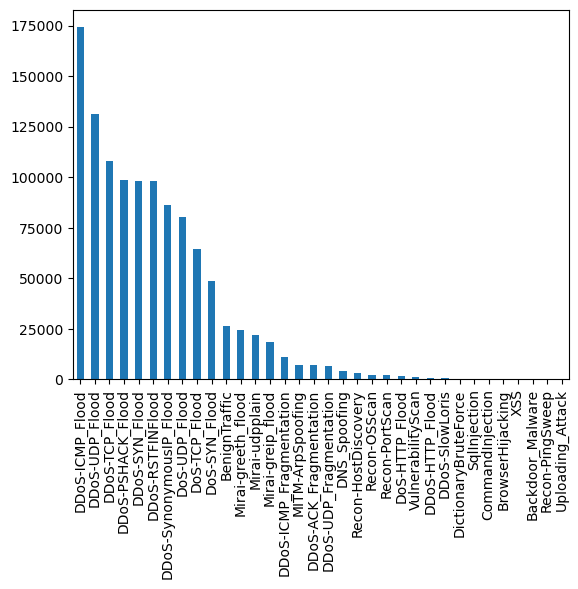

In [6]:
bar_graph('label')

In [7]:
#change Multi-class to binary-class
df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [8]:
df['label'].unique()

array(['DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-UDP_Flood',
       'DoS-SYN_Flood', 'Mirai-udpplain', 'DoS-UDP_Flood',
       'DDoS-SYN_Flood', 'DoS-TCP_Flood', 'DNS_Spoofing',
       'DDoS-RSTFINFlood', 'Mirai-greip_flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Fragmentation', 'DDoS-SynonymousIP_Flood',
       'BenignTraffic', 'Recon-OSScan', 'Mirai-greeth_flood',
       'MITM-ArpSpoofing', 'Recon-PortScan', 'DDoS-ICMP_Fragmentation',
       'Recon-HostDiscovery', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood',
       'DoS-HTTP_Flood', 'XSS', 'BrowserHijacking', 'VulnerabilityScan',
       'DictionaryBruteForce', 'DDoS-SlowLoris', 'SqlInjection',
       'CommandInjection', 'Uploading_Attack', 'Backdoor_Malware',
       'Recon-PingSweep'], dtype=object)

In [9]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,0.99,63.36,106.238703,106.238703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.18,42.0,42.18,42.009000,0.039230,42.18,8.312463e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
1,0.000000,54.20,6.00,64.00,2.650955,2.650955,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.01,0.0,0.99,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,570.20,54.0,57.20,54.302881,0.910514,54.20,8.331381e+07,9.5,10.421200,1.289175,5.376863,0.16,141.55,8
2,0.000000,0.00,1.00,64.00,26.901265,26.901265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312472e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.093392,71993.00,17.00,64.00,15462.296279,15462.296279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.312349e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
4,3.975955,108.00,6.00,64.00,0.503025,0.503025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.297753e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127521,0.000000,54.00,6.00,64.00,25.224003,25.224003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.307636e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
1127522,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
1127523,4.274490,107.85,6.00,64.00,0.463217,0.463217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.78,54.0,54.78,54.040026,0.172084,54.39,8.294658e+07,9.5,10.396218,0.246316,1.516787,0.02,141.55,20
1127524,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14


In [10]:
x=df.drop(columns=['label'])
y=df['label']

In [11]:
y

0           6
1           8
2           6
3          14
4          19
           ..
1127521    13
1127522     6
1127523    20
1127524    14
1127525     8
Name: label, Length: 1127526, dtype: int32

In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 902020
Testing set: 225506


In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.8023201156510248
precision: 0.8096278703257533
recall:  0.8023201156510248
f1:  0.7677540802206535


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9934857609110179
precision: 0.9932115263872598
recall:  0.9934857609110179
f1:  0.9929951678348561


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.7347520686810994
precision: 0.6848979570740064
recall:  0.7347520686810994
f1:  0.6594161222317996


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

accuracy 0.9858184255729189
precision:  0.9861669104580681
recall:  0.9858184255729189
f1: 0.9856663439882749


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# neural network

In [18]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [19]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(902020, 46)
(902020, 34)
(225506, 46)
(225506, 34)


In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [24]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
11269/11276 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy: 0.9790
Epoch 1: val_accuracy improved from -inf to 0.98095, saving model to nn.hdf5
11276/11276 [==============================] - 20s 2ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0671 - val_accuracy: 0.9809
Epoch 2/20
11262/11276 [============================>.] - ETA: 0s - loss: 0.0650 - accuracy: 0.9800
Epoch 2: val_accuracy did not improve from 0.98095
11276/11276 [==============================] - 19s 2ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0691 - val_accuracy: 0.9801
Epoch 3/20
11274/11276 [============================>.] - ETA: 0s - loss: 0.0668 - accuracy: 0.9798
Epoch 3: val_accuracy improved from 0.98095 to 0.98251, saving model to nn.hdf5
11276/11276 [==============================] - 19s 2ms/step - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0826 - val_accuracy: 0.9825
Epoch 4/20
11243/11276 [============================>.] - ETA: 0s - loss: 0.0682 - a

In [1]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

NameError: name 'plt' is not defined

7048/7048 [==============================] - 5s 746us/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score:  0.9809763780641342
Recall score:  0.9819250929021844
F1 score:  0.9803910726836996


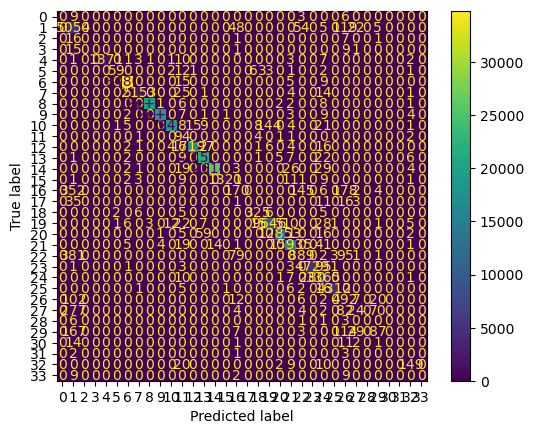

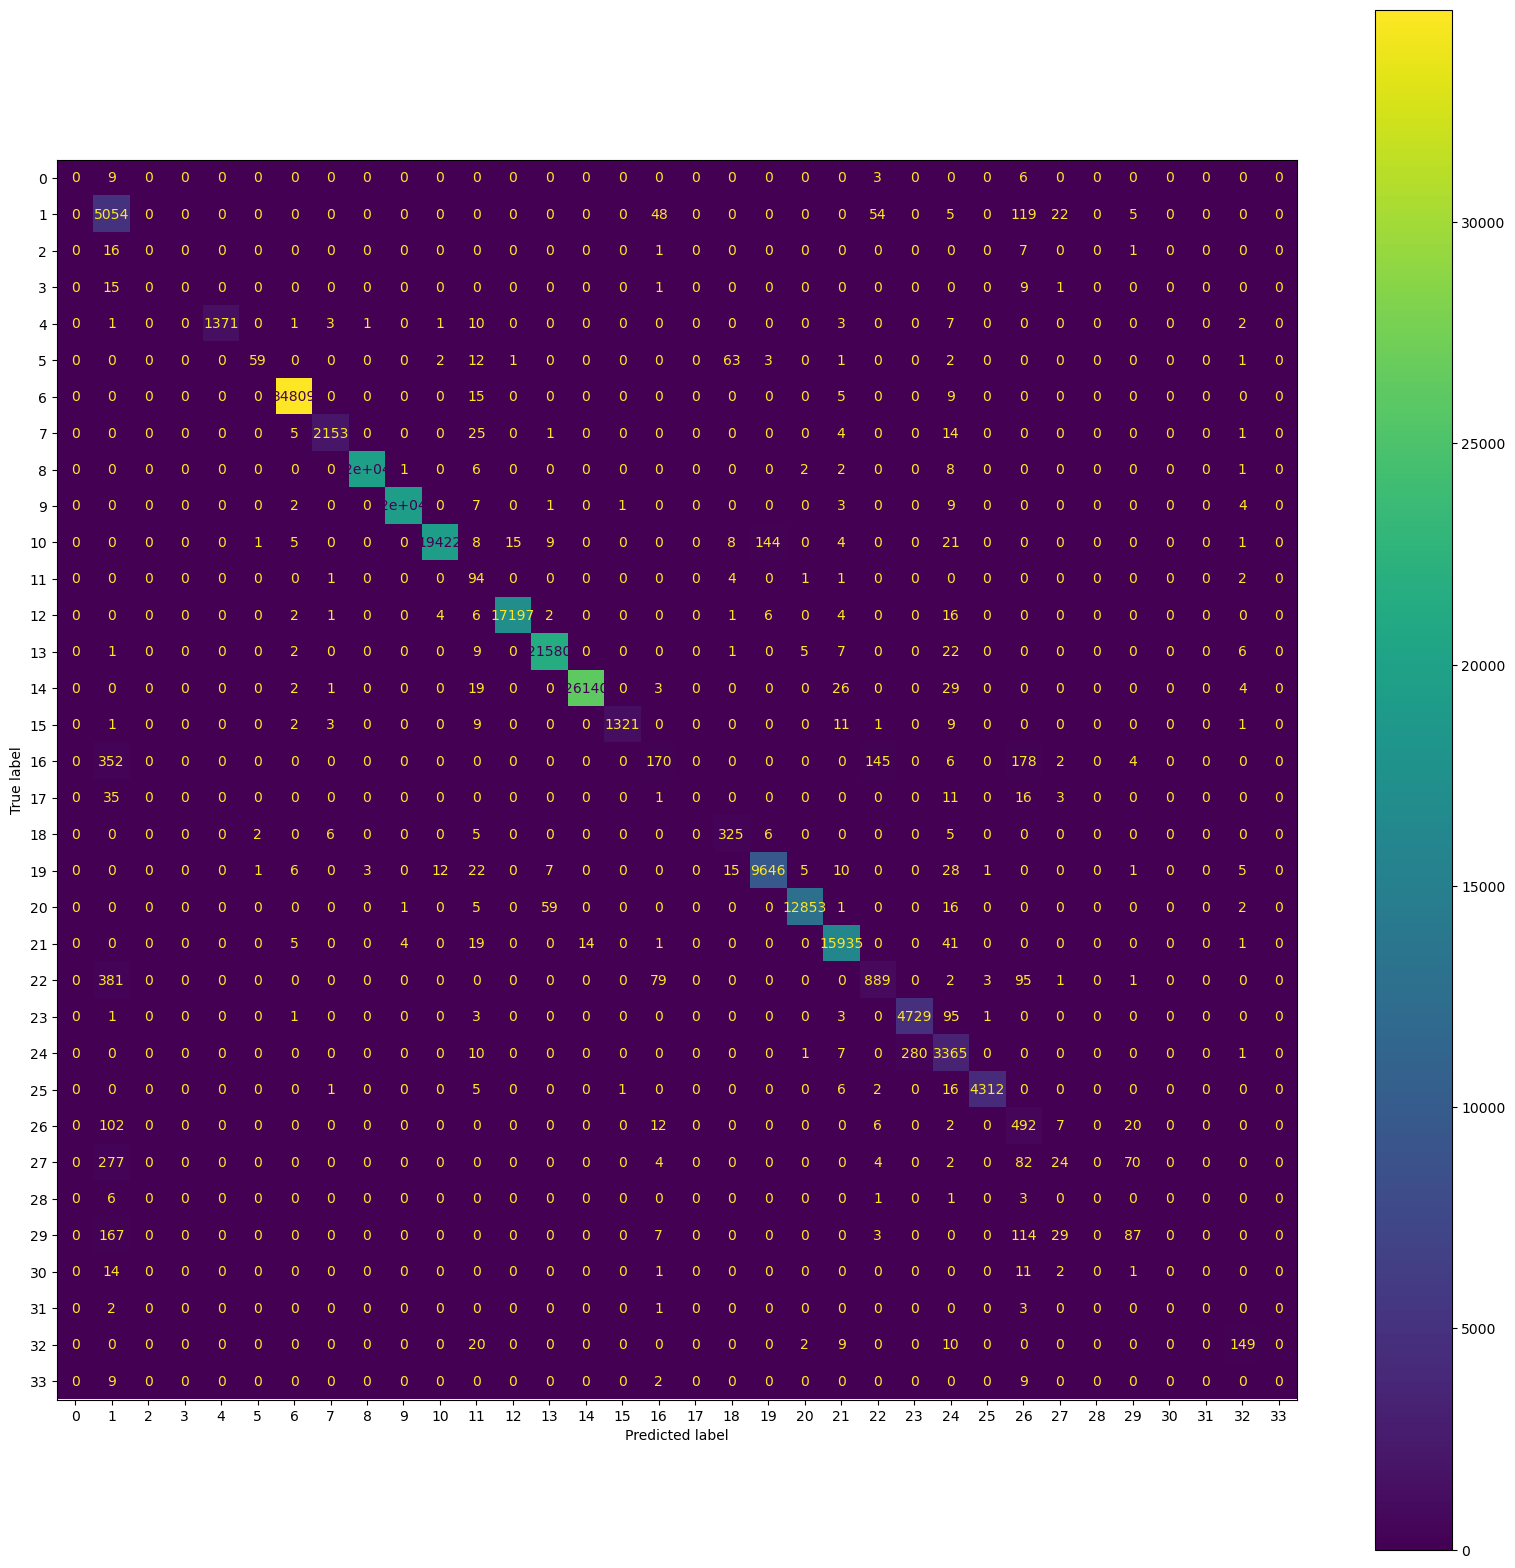

In [29]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))
cmp=ConfusionMatrixDisplay.from_predictions(y_test1, dnn_pred)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)